<a href="https://colab.research.google.com/github/andlcoelho/miniprojetos/blob/main/Desafio_aula2_Univali_SeriesTemporais_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DESAFIO UNIVALI - AULA 2 SERIES TEMPORAIS**

O uso de dados sequenciais para a criação de modelos matemáticos é de vital importância para o entendimento da dinâmica de diversos problemas encontrados diariamente, como o aquecimento global. O aquecimento global é o processo de aumento da temperatura média dos oceanos e da atmosfera da Terra causado por uma série de atividades humanas, principalmente pelo uso de combustíveis fósseis e desmatamento para expansão da produção agrícola. Este é um problema que vem sendo observado ao longo dos anos, de modo a apresentar grandes conjuntos de dados sequenciais.

**Com essas informações, você deve decompor a série em suas componentes de tendência e sazonalidade. Além disso, utilize o método de suavização exponencial sazonal de Holt-Winters e mais um método de sua escolha para a previsão do valor de temperatura para o próximo ano. Compare os resultados obtidos.**

IMPORTAÇÃO E ANÁLISE DO DATAFRAME

In [20]:
# importação das bibliotecas para análise dos dados
import pandas as pd
from pandas.core.indexes.datetimes import DatetimeIndex
from matplotlib import pyplot as plt
#from seasonal import fit_seasons, adjust_seasons
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA

In [21]:
# carrega o dataframe na variável df
df = pd.read_excel('/content/drive/MyDrive/Estudos/Univali - Tecnologo em Ciência de Dados/Conteúdo das Aulas/Series temporais/Desafio - Series Temporais.xlsx')

In [22]:
df.head()

,Ano,Observações
0,1880,-0.16
1,1881,-0.07
2,1882,-0.10
3,1883,-0.16
4,1884,-0.27


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ano          140 non-null    int64  
 1   Observações  140 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.3 KB


In [42]:
df['Ano'] = pd.to_datetime(df['Ano'], format = '%Y')

KeyError: ignored

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Ano          140 non-null    datetime64[ns]
 1   Observações  140 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.3 KB


In [26]:
df.head()

,Ano,Observações
0,1880-01-01,-0.16
1,1881-01-01,-0.07
2,1882-01-01,-0.10
3,1883-01-01,-0.16
4,1884-01-01,-0.27


In [27]:
df.set_index('Ano', drop = True, inplace = True)

In [38]:
# Realizar a decomposição da série em tendência, sazonalidade e resíduo
decomposition = seasonal_decompose(df['Observações'], model='additive', period=12)

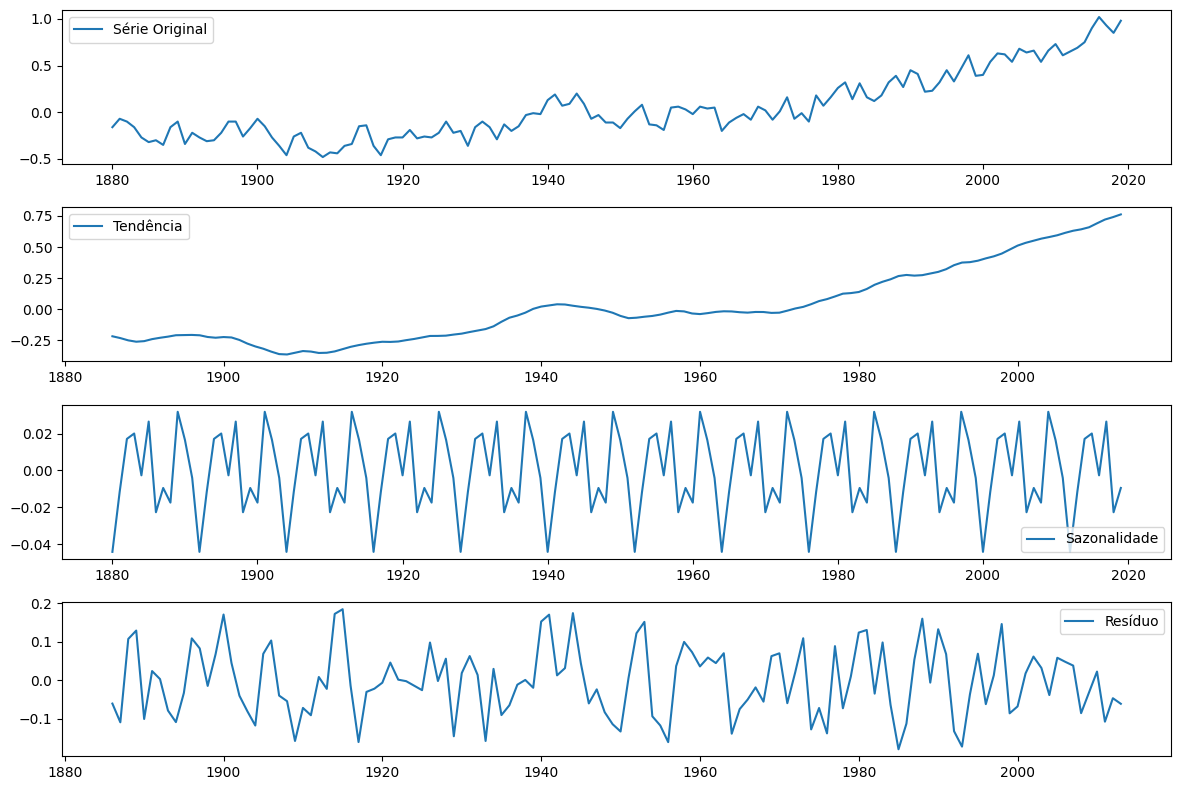

In [39]:
# Plotar a decomposição
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(df['Observações'], label='Série Original')
plt.legend(loc='best')
plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Tendência')
plt.legend(loc='best')
plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Sazonalidade')
plt.legend(loc='best')
plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Resíduo')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [41]:
# Aplicar o método de suavização exponencial sazonal de Holt-Winters
model = ExponentialSmoothing(df['Observações'], seasonal='add', seasonal_periods=12)
fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [43]:
next_year = fit.forecast(steps=12)

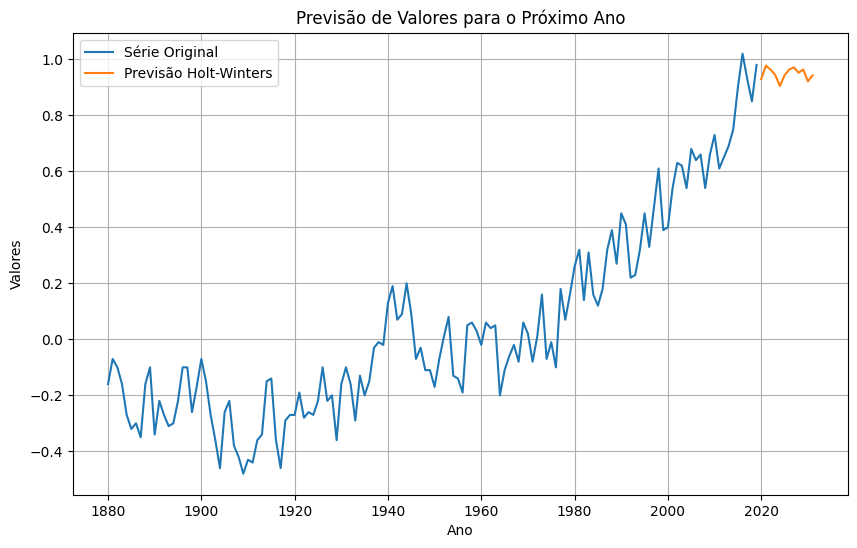

In [45]:
# Plotar a série original e a previsão para o próximo ano
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Observações'], label='Série Original')
plt.plot(next_year.index, next_year, label='Previsão Holt-Winters')
plt.legend(loc='best')
plt.xlabel('Ano')
plt.ylabel('Valores')
plt.title('Previsão de Valores para o Próximo Ano')
plt.grid(True)
plt.show()